## Creating Right Model

In [5]:
rightDatasetPath = 'dataset/alphabetaRight.csv'
leftDatasetPath = 'dataset/alphabetaLeft.csv'
rightSavePath = 'model/alphabetaRight.h5'
leftSavePath = 'model/alphabetaLeft.h5'
outputLeftSize = 12
outputRightSize = 24
import os
print(os.getcwd())
import os
print(os.getcwd())
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import csv

C:\Notebooks\ISL
C:\Notebooks\ISL


In [6]:
dataframe = pandas.read_csv(rightDatasetPath, header=None)
dataset = dataframe.values
X = dataset[:,0:40].astype(float)
Y = dataset[:,40]
Y_uni = []
for i in range(len(Y)):
    if Y[i] not in Y_uni:
        Y_uni.append(Y[i])
print(Y_uni)
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

#define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=40, activation='relu'))
    #model.add(Dense(64, input_dim=32, activation='relu'))
    model.add(Dense(outputRightSize, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


modelRight = baseline_model()
historyRight = modelRight.fit(X, dummy_y, epochs=100, batch_size=5)
modelRight.save(rightSavePath)

// 100 epoch
// 1000
// batch size 5

1 epoch - number 
1000 / 5 = 200

['a_right', 'b_right', 'c', 'e_right', 'f_right', 'g_right', 'i', 'j_right', 'k_right', 'l', 'n_right', 'p_right', 's_right', 'u', 'zz_0', 'zz_1', 'zz_2', 'zz_3', 'zz_4', 'zz_5', 'zz_6', 'zz_7', 'zz_8', 'zz_9']
Epoch 1/100
5282/5282 [==============================] - 7s 1ms/step - loss: 2.2435 - accuracy: 0.4496
Epoch 2/100
5282/5282 [==============================] - 6s 1ms/step - loss: 0.5482 - accuracy: 0.8998
Epoch 3/100
5282/5282 [==============================] - 6s 1ms/step - loss: 0.3060 - accuracy: 0.9327
Epoch 4/100
5282/5282 [==============================] - 5s 1ms/step - loss: 0.2432 - accuracy: 0.9470
Epoch 5/100
5282/5282 [==============================] - 6s 1ms/step - loss: 0.2107 - accuracy: 0.9501
Epoch 6/100
5282/5282 [==============================] - 6s 1ms/step - loss: 0.1722 - accuracy: 0.9595
Epoch 7/100
5282/5282 [==============================] - 6s 1ms/step - loss: 0.1655 - accuracy: 0.9621
Epoch 8/100
5282/5282 [==============================] - 5s 1ms/step

KeyboardInterrupt: 

<br>

## Create Left Model

In [13]:
dataframe = pandas.read_csv(leftDatasetPath, header=None)
dataset = dataframe.values
X = dataset[:,0:40].astype(float)
Y = dataset[:,40]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

#define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=40, activation='relu'))
    
    #model.add(Dense(64, input_dim=32, activation='relu'))
    model.add(Dense(outputLeftSize, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


modelLeft = baseline_model()
historyLeft = modelLeft.fit(X, dummy_y, epochs=100, batch_size=5)
modelLeft.save(leftSavePath)

Epoch 1/100
2920/2920 [==============================] - 6s 2ms/step - loss: 2.0321 - accuracy: 0.3951
Epoch 2/100
2920/2920 [==============================] - 6s 2ms/step - loss: 0.7272 - accuracy: 0.8824
Epoch 3/100
2920/2920 [==============================] - 7s 2ms/step - loss: 0.3710 - accuracy: 0.9359
Epoch 4/100
2920/2920 [==============================] - 6s 2ms/step - loss: 0.2718 - accuracy: 0.9441
Epoch 5/100
2920/2920 [==============================] - 5s 2ms/step - loss: 0.2160 - accuracy: 0.9543
Epoch 6/100
2920/2920 [==============================] - 5s 2ms/step - loss: 0.2074 - accuracy: 0.9531
Epoch 7/100
2920/2920 [==============================] - 5s 2ms/step - loss: 0.1952 - accuracy: 0.9544
Epoch 8/100
2920/2920 [==============================] - 6s 2ms/step - loss: 0.1794 - accuracy: 0.9589
Epoch 9/100
2920/2920 [==============================] - 5s 2ms/step - loss: 0.1578 - accuracy: 0.9657
Epoch 10/100
2920/2920 [==============================] - 5s 2ms/step - l

### Plotting Accuracy and Loss

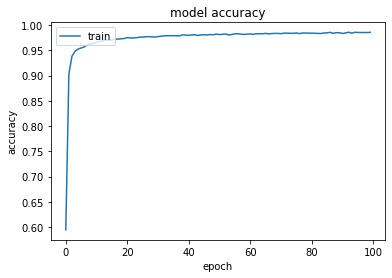

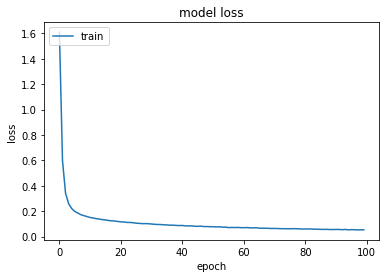

In [15]:
#summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(historyLeft.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyLeft.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

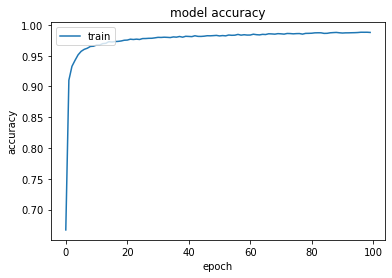

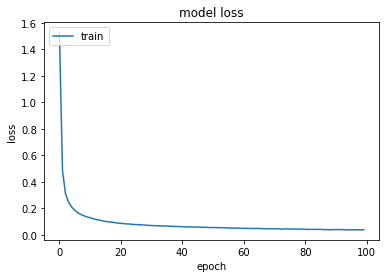

In [16]:
#summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(historyRight.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyRight.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()